In [1]:
import pandas as pd
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('EE8223_11_tiles_deduplicated.csv')

In [3]:
tile_arr = np.array([])
for hg in range(1, 289):
    gf = len(df1[df1['TileNumber']==hg])
    
    if gf > 5000:
        print(hg)
        df1 = df1.drop(df1[df1['TileNumber']==hg].iloc[2200 + random.randint(0, 300):].index)
    df1 = df1.reset_index(drop = True)

    gf = len(df1[df1['TileNumber']==hg])
    tile_arr = np.append(tile_arr, gf)
    
# tile_arr = (tile_arr - tile_arr.min()) / (tile_arr.max() - tile_arr.min())

tile_arr = tile_arr.reshape(12, 24)


26
27
33
35
49
50
58
59
72
73
74
96
97
98
120
121
122
132
144
145
146
156
157
167
168
169
170
171
180
181
182
183
191
192
193
194
195
196
204
205
206
207
208
215
216
217
218
219
220
228
229
230
231
240
243
244
252
254


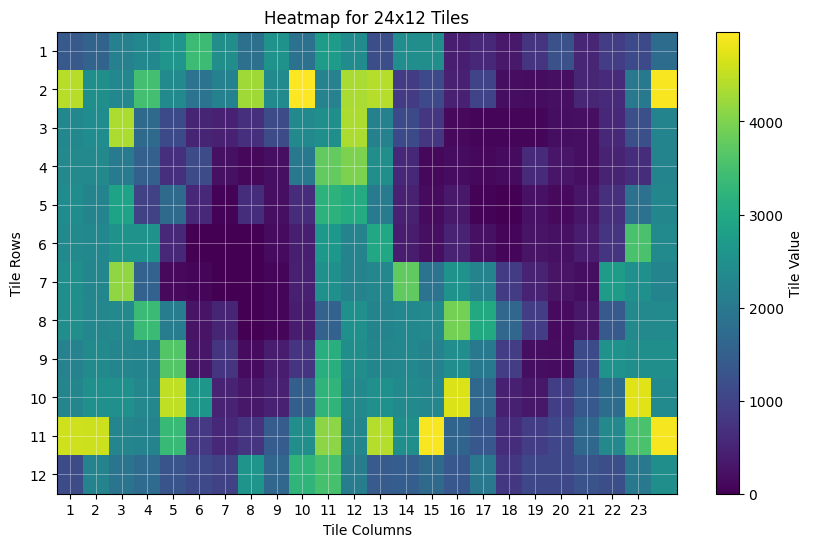

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(10, 6))
plt.imshow(tile_arr, cmap='viridis', aspect='auto')

# Add colorbar for reference
plt.colorbar(label='Tile Value')

# Add labels and title
plt.title('Heatmap for 24x12 Tiles')
plt.xlabel('Tile Columns')
plt.ylabel('Tile Rows')

# Show the grid lines
# plt.xticks(range( 12))
# plt.yticks(range(23))

plt.yticks(range(12), range(1, 13))  # Columns
plt.xticks(range(23), range(1, 24))  # Rows


plt.grid(color='white', linestyle='-', linewidth=0.5, alpha=0.5)

# Display the heatmap
plt.show()
plt.savefig('heatmap.jpg')

In [2]:
os.chdir('Experiment_1')

In [3]:
#0-1-2-8
folders = [1, 2, 7, 11, 14, 19, 32, 36, 38, 39, 42, 43]
for folder_path in folders:
    # print(folder_path, type(folder_path))
    files = glob.glob(os.path.join(str(folder_path), '*'))
    
    for file_path in files:
        if int(file_path[-5]) in [0,1,2,8]:
            if int(file_path[-5])==0 and int(folder_path)==1:
                df1 = pd.read_csv(file_path)
                df1['user'] = folder_path
                df1['video'] = int(file_path[-5])
                # print(file_path)
            else:
                df2 = pd.read_csv(file_path)
                df2['user'] = folder_path
                df2['video'] = int(file_path[-5])
                # print(len(df2))
                df1 = pd.concat([df1, df2], ignore_index=True)
                df1 = df1.reset_index(drop=True)
    
    
    # print(folder_path)
    # print(df1.shape)

df1 = df1.drop(columns='Timestamp')

df1

,PlaybackTime,UnitQuaternion.x,UnitQuaternion.y,UnitQuaternion.z,UnitQuaternion.w,HmdPosition.x,HmdPosition.y,HmdPosition.z,user,video
0,1.247,-0.015,0.948,-0.063,-0.310,-0.160,1.116,-0.259,1,0
1,1.247,-0.015,0.948,-0.063,-0.310,-0.160,1.116,-0.259,1,0
2,1.247,-0.015,0.949,-0.065,-0.309,-0.160,1.116,-0.260,1,0
3,0.000,-0.015,0.949,-0.065,-0.309,-0.160,1.116,-0.260,1,0
4,0.000,-0.015,0.949,-0.065,-0.309,-0.160,1.115,-0.260,1,0
...,...,...,...,...,...,...,...,...,...,...
1031580,292.036,0.164,-0.612,0.251,0.732,-0.174,1.119,-0.498,43,8
1031581,292.036,0.162,-0.602,0.247,0.741,-0.173,1.120,-0.496,43,8
1031582,292.058,0.160,-0.592,0.244,0.751,-0.173,1.121,-0.493,43,8
1031583,292.058,0.158,-0.582,0.241,0.760,-0.172,1.123,-0.491,43,8


In [ ]:
for i in range(9): 
    print(i)
    print(100*len(df1[df1['video']==i])/len(df1))
    

In [ ]:
df1[df1['user']==11].head(30)

In [ ]:
#[1,2,7,11,14,19,32,36,38,39,42,43]

In [ ]:
# os.getcwd()

In [ ]:
# glob.glob(os.path.join('2', '*'))

In [ ]:
# glob.glob('*')

In [ ]:
# df1.to_csv('final.csv', index=False)

In [4]:
import pandas as pd
import numpy as np

# Define video resolution and tile grid
video_width = 2560
video_height = 1440
tiles_x = 24  # Number of tiles horizontally
tiles_y = 12  # Number of tiles vertically
fov_width_tiles = 6  # FoV width in tiles
fov_height_tiles = 4  # FoV height in tiles

# Function to calculate x, y, tile number, and FoV tiles
def calculate_features(row):
    try:
        qx, qy, qz, qw = row['UnitQuaternion.x'], row['UnitQuaternion.y'], row['UnitQuaternion.z'], row['UnitQuaternion.w']
        
        # Step 1: Calculate the unit vector components
        rx = 2 * qx * qz + 2 * qy * qw
        ry = 2 * qy * qz - 2 * qx * qw
        rz = 1 - 2 * qx**2 - 2 * qy**2

        # Ensure rz is in the valid range for arccos
        rz = np.clip(rz, -1, 1)

        # Step 2: Compute φ (phi) and θ (theta)
        phi = np.arctan2(ry, rx)  # Longitude
        theta = np.arccos(rz)     # Latitude

        # Step 3: Compute y
        if np.isnan(theta):
            raise ValueError("Theta is NaN due to invalid quaternion data.")
        y = video_height - video_height * (theta / np.pi)

        # Step 4: Compute x
        if ry >= 0:
            x = (3 * video_width / 4) + np.sign(rx) * video_width * (phi / (2 * np.pi))
        else:
            x = (video_width / 2) - np.sign(rx) * video_width * (phi / (2 * np.pi))

        if np.isnan(x) or np.isnan(y):
            raise ValueError("Calculated x or y is NaN.")

        # Step 5: Determine tile indices
        tile_width = video_width / tiles_x
        tile_height = video_height / tiles_y
        tile_x = int(np.clip(x // tile_width, 0, tiles_x - 1))  # Ensure within bounds
        tile_y = int(np.clip(y // tile_height, 0, tiles_y - 1))  # Ensure within bounds

        # print('tile_x', tile_x, 'tile_y', tile_y)
        # Step 6: Compute the central tile number
        tile_number = tile_y * tiles_x + tile_x + 1

        # Step 7: Calculate the list of FoV tiles as (row, col) tuples
        fov_tiles = []
        for dx in range(-fov_width_tiles // 2, fov_width_tiles // 2 + 1):
            for dy in range(-fov_height_tiles // 2, fov_height_tiles // 2 + 1):
                neighbor_tile_x = (tile_x + dx) % tiles_x  # Wrap horizontally
                neighbor_tile_y = max(0, min(tile_y + dy, tiles_y - 1))  # Clamp vertically
                fov_tiles.append((neighbor_tile_y, neighbor_tile_x))  # Append as tuple (row, col)

        return x, y, tile_number, sorted(fov_tiles)
    except Exception as e:
        # Log the error and return default values for invalid rows
        print(f"Error processing row: {row}, Error: {e}")
        return np.nan, np.nan, np.nan, []


# Load the dataset
# file_path = r"final.csv"
# data = pd.read_csv(file_path)
data = df1

# Apply the function to each row
features = data.apply(calculate_features, axis=1)

# Split the results into separate columns
data['x'] = features.apply(lambda f: f[0])
data['y'] = features.apply(lambda f: f[1])
data['TileNumber'] = features.apply(lambda f: f[2])
data['FoVTiles'] = features.apply(lambda f: f[3])

# Save the updated dataset
output_path = r"video_0_with_features.csv"
data.to_csv(output_path, index=False)

print(f"Processed data saved to: {output_path}")

Processed data saved to: video_0_with_features.csv


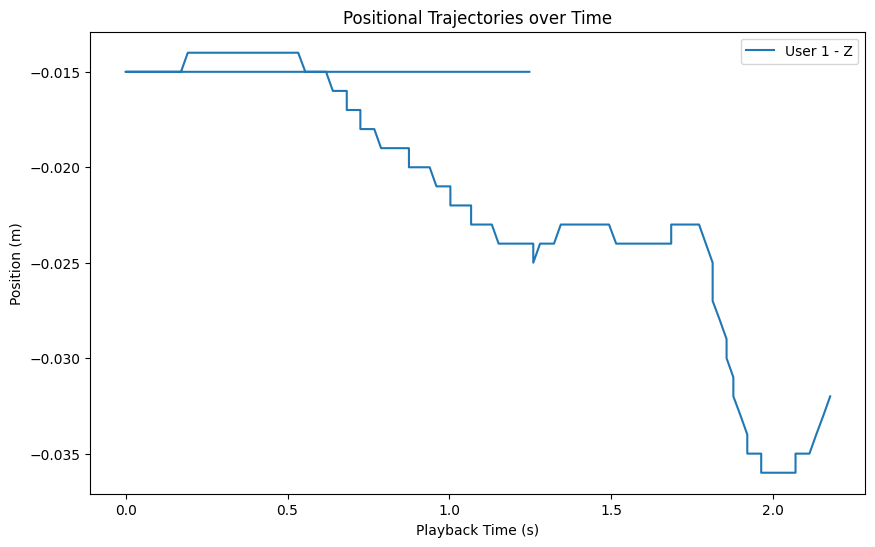

In [5]:
plt.figure(figsize=(10, 6))
# plt.plot(data["PlaybackTime"].iloc[:1000], data["HmdPosition.x"].iloc[:1000], label=f"User 1 - X")
plt.plot(data["PlaybackTime"].iloc[:200], data["UnitQuaternion.x"].iloc[:200], label=f"User 1 - Z")
plt.xlabel("Playback Time (s)")
plt.ylabel("Position (m)")
plt.title("Positional Trajectories over Time")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=data["HmdPosition.x"], y=data["HmdPosition.z"],
    fill=True, cmap="viridis", alpha=0.7
)
plt.xlabel("X Position (m)")
plt.ylabel("Z Position (m)")
plt.title("Heatmap of Positional Data")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
data["TileNumber"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Tile Number")
plt.ylabel("Count")
plt.title("Tile Access Distribution")
plt.show()


In [ ]:
data

In [ ]:
data.head(5)

In [ ]:
data.shape

start reading data
data read
i= 0
i= 1000
i= 2000
i= 3000
i= 4000
i= 5000
i= 6000
i= 7000
i= 8000
i= 9000
(7992,)
epoch= 0
kj= 0
kj= 100
kj= 200
Epoch 1/20, Train Loss: 3.1853, Val Loss: 1.3968, Val Accuracy: 1.0000
epoch= 1
kj= 0
kj= 100
kj= 200
Epoch 2/20, Train Loss: 2.6518, Val Loss: 0.7288, Val Accuracy: 1.0000
epoch= 2
kj= 0
kj= 100
kj= 200
Epoch 3/20, Train Loss: 2.0477, Val Loss: 0.2232, Val Accuracy: 1.0000
epoch= 3
kj= 0
kj= 100
kj= 200
Epoch 4/20, Train Loss: 1.5406, Val Loss: 0.6338, Val Accuracy: 1.0000
epoch= 4
kj= 0
kj= 100
kj= 200
Epoch 5/20, Train Loss: 1.3608, Val Loss: 0.3085, Val Accuracy: 1.0000
epoch= 5
kj= 0
kj= 100
kj= 200
Epoch 6/20, Train Loss: 1.1332, Val Loss: 0.6551, Val Accuracy: 0.7372
epoch= 6
kj= 0
kj= 100
kj= 200
Epoch 7/20, Train Loss: 1.0354, Val Loss: 0.1456, Val Accuracy: 1.0000
epoch= 7
kj= 0
kj= 100
kj= 200
Epoch 8/20, Train Loss: 0.9223, Val Loss: 0.0735, Val Accuracy: 1.0000
epoch= 8
kj= 0
kj= 100
kj= 200
Epoch 9/20, Train Loss: 0.8588, Val Los

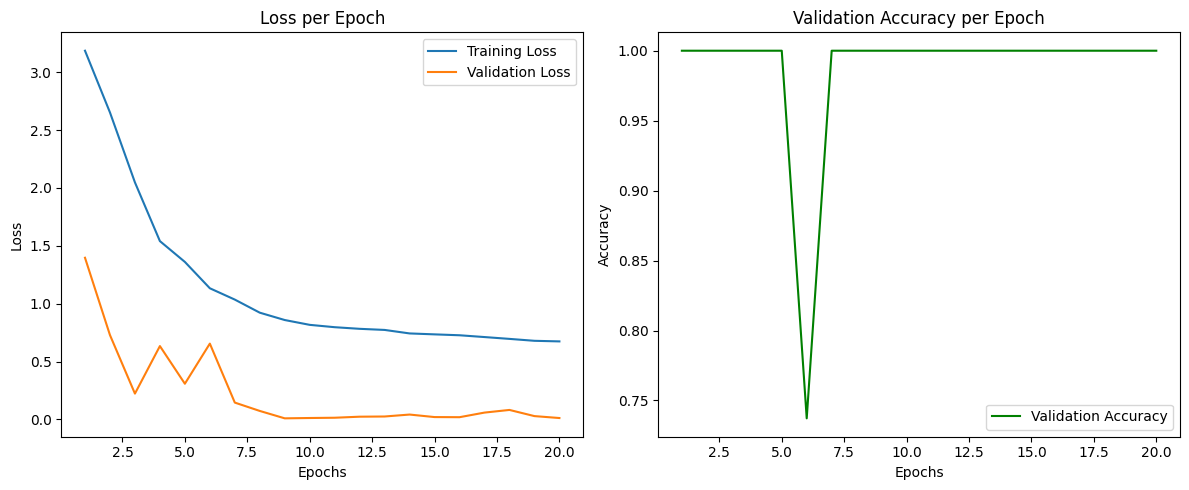

In [6]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Define the LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.2):
        super().__init__()
        # super(LSTMClassifier, self).init()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].min()) / (data['x'].max() - data['x'].min())
    data['y'] = (data['y'] - data['y'].min()) / (data['y'].max() - data['y'].min())

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        if i%1000==0:
            print('i=', i)
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)

# Training and validation loop
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer):
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        print('epoch=', epoch)
        # Training
        model.train()
        train_loss = 0.0
        kj=0
        for X_batch, y_batch in train_loader:
            if kj%100==0:
                print('kj=', kj)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            kj+=1
            
        train_losses.append(train_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            kk=0
            for X_batch, y_batch in test_loader:
                kk+=0
                # print('kk=', kk)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()
                
                
        val_losses.append(val_loss / len(test_loader))
        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return train_losses, val_losses, val_accuracies

# Plotting function
def plot_metrics(train_losses, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Validation Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = r"video_0_with_features.csv"
    print('start reading data')
    data = pd.read_csv(file_path)
    data = data.iloc[:10000]
    print('data read')
    # Preprocess data
    sequence_length = 10
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels = np.unique(y)
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    y = np.array([label_map[label] for label in y])

    # Split into training and testing sets
    split_ratio = 0.8
    split_idx = int(len(X) * split_ratio)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(y_train.shape)
    # Create PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Model, criterion, optimizer
    input_size = 2  # x and y
    hidden_size = 64
    output_size = len(unique_labels)
    num_layers = 2
    dropout = 0.2
    epochs = 20
    learning_rate = 0.001

    model = LSTMClassifier(input_size, hidden_size, output_size, num_layers, dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train and validate
    train_losses, val_losses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer
    )

    # Plot metrics
    plot_metrics(train_losses, val_losses, val_accuracies)

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Define the LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].min()) / (data['x'].max() - data['x'].min())
    data['y'] = (data['y'] - data['y'].min()) / (data['y'].max() - data['y'].min())

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)

# Training and validation loop
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return train_losses, train_accuracies, val_losses, val_accuracies

# Plotting function
def plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = r"video_0_with_features.csv"
    print('Start reading data...')
    data = pd.read_csv(file_path)
    data = data.iloc[:10000]
    print('Data read successfully.')

    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels = np.unique(y)
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    y = np.array([label_map[label] for label in y])

    # Split into training and testing sets
    split_ratio = 0.8
    split_idx = int(len(X) * split_ratio)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(y_train.shape)
    # Create PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Model, criterion, optimizer
    input_size = 2  # x and y
    hidden_size = 64
    output_size = len(unique_labels)
    num_layers = 2
    dropout = 0.4
    epochs = 100
    learning_rate = 0.001

    model = LSTMClassifier(input_size, hidden_size, output_size, num_layers, dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train and validate
    train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer
    )

    # Plot metrics
    plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Define the LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=3, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)

# Training and validation loop with gradient clipping
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer, scheduler=None):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    best_val_accuracy = 0
    patience = 10
    early_stop_counter = 0

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()

            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Early stopping
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break

        # Learning rate scheduler step
        if scheduler:
            scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies

# Plotting function
def plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = r"video_0_with_features.csv"
    print('Start reading data...')
    data = pd.read_csv(file_path)
    data = data.iloc[:10000]
    print('Data read successfully.')

    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels = np.unique(y)
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    y = np.array([label_map[label] for label in y])

    # Split into training and testing sets
    split_ratio = 0.8
    split_idx = int(len(X) * split_ratio)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(y_train.shape)
    # Create PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Smaller batch size
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Model, criterion, optimizer
    input_size = 2  # x and y
    hidden_size = 128  # Increased hidden size
    output_size = len(unique_labels)
    num_layers = 3  # More LSTM layers
    dropout = 0.2
    epochs = 200  # Increased epochs
    learning_rate = 0.001

    model = LSTMClassifier(input_size, hidden_size, output_size, num_layers, dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)  # Learning rate scheduler

    # Train and validate
    train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer, scheduler
    )

    # Plot metrics
    plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Define the LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=3, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)

# Training and validation loop with gradient clipping
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer, scheduler=None):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()

            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Learning rate scheduler step
        if scheduler:
            scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies

# Plotting function
def plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = r"video_0_with_features.csv"
    print('Start reading data...')
    data = pd.read_csv(file_path)
    data = data.iloc[:10000]
    print('Data read successfully.')

    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels = np.unique(y)
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    y = np.array([label_map[label] for label in y])

    # Split into training and testing sets
    split_ratio = 0.8
    split_idx = int(len(X) * split_ratio)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(y_train.shape)
    # Create PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Smaller batch size
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Model, criterion, optimizer
    input_size = 2  # x and y
    hidden_size = 128  # Increased hidden size
    output_size = len(unique_labels)
    num_layers = 3  # More LSTM layers
    dropout = 0.2
    epochs = 200  # Increased epochs
    learning_rate = 0.001

    model = LSTMClassifier(input_size, hidden_size, output_size, num_layers, dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)  # Learning rate scheduler

    # Train and validate
    train_losses, train_accuracies, val_lweosses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer, scheduler
    )

    # Plot metrics
    plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=3, dropout=0.5):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)

# Training and validation loop
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer, scheduler=None):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()

            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Learning rate scheduler step
        if scheduler:
            scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies

# Plotting function
def plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = r"video_0_with_features.csv"
    print('Start reading data...')
    data = pd.read_csv(file_path)
    data = data.iloc[:10000]
    print('Data read successfully.')

    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels, counts = np.unique(y, return_counts=True)
    print("Original Class Distribution:", dict(zip(unique_labels, counts)))

    # Handle classes with fewer than 2 samples
    min_samples = 2
    valid_classes = [cls for cls, count in zip(unique_labels, counts) if count >= min_samples]
    mask = np.isin(y, valid_classes)
    X = X[mask]
    y = y[mask]

    # Re-encode labels to ensure they are sequential
    label_map = {label: idx for idx, label in enumerate(np.unique(y))}
    y = np.array([label_map[label] for label in y])

    print("Filtered Class Distribution:", dict(zip(*np.unique(y, return_counts=True))))

    # Stratified split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print("Training Class Distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
    print("Validation Class Distribution:", dict(zip(*np.unique(y_test, return_counts=True))))

    # Create PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Model, criterion, optimizer
    input_size = 2
    hidden_size = 128
    output_size = len(np.unique(y))  # Correct output size
    num_layers = 3
    dropout = 0.5
    epochs = 200
    learning_rate = 0.001

    model = LSTMClassifier(input_size, hidden_size, output_size, num_layers, dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Train and validate
    train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer
    )

    # Plot metrics
    plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)

    # Classification Report
    y_true = []
    y_pred = []

    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(predicted.numpy())

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the VR Classifier with Conv2D, LSTM, and Fully Connected Layers
class VRClassifier(nn.Module):
    def __init__(self, input_size, sequence_length, lstm_hidden_size, output_size, num_lstm_layers=2, dropout=0.4):
        super(VRClassifier, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3), padding=1)  # [Batch, 1, Seq, Feat]
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1)  # [Batch, 32, Seq, Feat]
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))  # Pooling layer
        self.bn1 = nn.BatchNorm2d(64)  # Batch normalization

        # LSTM Layers
        self.lstm = nn.LSTM(
            input_size=(input_size // 2) * 64,  # Adjust for pooled spatial size
            hidden_size=lstm_hidden_size,
            num_layers=num_lstm_layers,
            dropout=dropout,
            batch_first=True
        )

        # Fully Connected Layers
        self.fc1 = nn.Linear(lstm_hidden_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc_output = nn.Linear(64, output_size)

    def forward(self, x):
        # Reshape for Convolutional Layers
        x = x.unsqueeze(1)  # [Batch, 1, Seq, Feat]

        # Convolutional Layers
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn1(x)

        # Flatten for LSTM
        x = x.permute(0, 2, 1, 3).reshape(x.size(0), x.size(2), -1)  # [Batch, Seq/2, Features]

        # LSTM Layers
        _, (hidden, _) = self.lstm(x)  # Use the final hidden state
        
        # Fully Connected Layers
        x = torch.relu(self.fc1(hidden[-1]))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc_output(x)  # Output layer


# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)


# Training and validation loop
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer, scheduler=None):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()
            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation
        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracies.append(correct_val / total_val)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")
        if scheduler:
            scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies


# Plotting function
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = "video_0_with_features.csv"
    data = pd.read_csv(file_path).iloc[:10000]

    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels, counts = np.unique(y, return_counts=True)
    print("Original Class Distribution:", dict(zip(unique_labels, counts)))

    # Handle rare classes
    min_samples = 2
    valid_classes = [cls for cls, count in zip(unique_labels, counts) if count >= min_samples]
    mask = np.isin(y, valid_classes)
    X, y = X[mask], y[mask]

    label_map = {label: idx for idx, label in enumerate(np.unique(y))}
    y = np.array([label_map[label] for label in y])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Model setup
    input_size = 2
    lstm_hidden_size = 128
    output_size = len(np.unique(y))
    dropout = 0.4
    epochs = 200
    learning_rate = 0.001

    model = VRClassifier(input_size, sequence_length, lstm_hidden_size, output_size, dropout=dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Train and validate
    train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer
    )

    # Plot metrics
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

    # Classification Report
    y_true, y_pred = [], []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(predicted.numpy())

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the VR Classifier with Conv2D, LSTM, and Fully Connected Layers
class VRClassifier(nn.Module):
    def __init__(self, input_size, sequence_length, lstm_hidden_size, output_size, num_lstm_layers=2, dropout=0.4):
        super(VRClassifier, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3), padding=1)  # [Batch, 1, Seq, Feat]
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1)  # [Batch, 32, Seq, Feat]
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))  # Pooling layer
        self.bn1 = nn.BatchNorm2d(64)  # Batch normalization

        # LSTM Layers
        self.lstm = nn.LSTM(
            input_size=(input_size // 2) * 64,  # Adjust for pooled spatial size
            hidden_size=lstm_hidden_size,
            num_layers=num_lstm_layers,
            dropout=dropout,
            batch_first=True
        )

        # Fully Connected Layers
        self.fc1 = nn.Linear(lstm_hidden_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc_output = nn.Linear(32, output_size)

    def forward(self, x):
        # Reshape for Convolutional Layers
        x = x.unsqueeze(1)  # [Batch, 1, Seq, Feat]

        # Convolutional Layers
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn1(x)

        # Flatten for LSTM
        x = x.permute(0, 2, 1, 3).reshape(x.size(0), x.size(2), -1)  # [Batch, Seq/2, Features]

        # LSTM Layers
        _, (hidden, _) = self.lstm(x)  # Use the final hidden state
        
        # Fully Connected Layers
        x = torch.relu(self.fc1(hidden[-1]))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc_output(x)  # Output layer


# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)


# Training and validation loop
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer, scheduler=None):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()
            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation
        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracies.append(correct_val / total_val)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")
        if scheduler:
            scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies


# Plotting function
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = "video_0_with_features.csv"
    data = pd.read_csv(file_path).iloc[:10000]

    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels, counts = np.unique(y, return_counts=True)
    print("Original Class Distribution:", dict(zip(unique_labels, counts)))

    # Handle rare classes
    min_samples = 2
    valid_classes = [cls for cls, count in zip(unique_labels, counts) if count >= min_samples]
    mask = np.isin(y, valid_classes)
    X, y = X[mask], y[mask]

    label_map = {label: idx for idx, label in enumerate(np.unique(y))}
    y = np.array([label_map[label] for label in y])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Model setup
    input_size = 2
    lstm_hidden_size = 128
    output_size = len(np.unique(y))
    dropout = 0.4
    epochs = 200
    learning_rate = 0.001

    model = VRClassifier(input_size, sequence_length, lstm_hidden_size, output_size, dropout=dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Train and validate
    train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer
    )

    # Plot metrics
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

    # Classification Report
    y_true, y_pred = [], []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(predicted.numpy())

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))


In [ ]:
len(np.unique(y_true))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred
})
results_df = results_df.iloc[:250]

# Option 2: Scatter Plot for Prediction Accuracy
plt.figure(figsize=(12, 6))
plt.scatter(results_df.index, results_df['Actual'], label='Actual', alpha=0.7, color='#008080', s=30, marker='*')
plt.scatter(results_df.index, results_df['Predicted'], label='Predicted', alpha=0.7, color='#DA70D6', s=30, marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Tile Number")
plt.title("Scatter Plot of Actual vs. Predicted Tile Numbers")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
file_path = "video_0_with_features.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

data = data.iloc[:100]
data.head(100)
# # Ensure the dataset has the required columns: 'x', 'y', 'TileNumber'
# x_col = "x"  # X-coordinate
# y_col = "y"  # Y-coordinate
# tile_col = "TileNumber"  # User or scenario identifier

# # Filter the data to include only valid rows (drop NaN values)
# data = data.dropna(subset=[x_col, y_col, tile_col])

# # Convert the TileNumber column to categorical (optional)
# data[tile_col] = data[tile_col].astype(int).astype(str)  # Convert to string for grouping

# # Get unique tile numbers (or users/scenarios) for plotting
# unique_tiles = data[tile_col].unique()
# num_tiles = len(unique_tiles)

# # Set up the grid for subplots (adjust grid size for your data)
# rows, cols = (num_tiles + 1) // 2, 2  # Create a 2-column grid layout
# fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), sharex=True, sharey=True)
# axes = axes.flatten()

# # Generate a heatmap for each tile number (or user/scenario)
# for i, tile in enumerate(unique_tiles):
#     tile_data = data[data[tile_col] == tile]  # Filter for the current tile/user
#     sns.kdeplot(
#         x=tile_data[x_col],
#         y=tile_data[y_col],
#         fill=True,
#         cmap="viridis",
#         ax=axes[i],
#         alpha=0.8
#     )
#     axes[i].set_title(f"Tile {tile}")
#     axes[i].set_xlim(-1.5, 1.5)
#     axes[i].set_ylim(-1.5, 1.5)
#     axes[i].set_xlabel("X axis [m]")
#     axes[i].set_ylabel("Y axis [m]")

# # Remove unused subplots if there are any
# for j in range(len(unique_tiles), len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout and add a main title
# fig.tight_layout()
# fig.suptitle("User movement heatmap on the horizontal plane (X and Y coordinates)", fontsize=16, y=1.02)

# # Show the plot
# plt.show()


In [20]:
##### MAIN
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the VR Classifier with Conv2D, LSTM, and Fully Connected Layers
class VRClassifier(nn.Module):
    def __init__(self, input_size, sequence_length, lstm_hidden_size, output_size, num_lstm_layers=2, dropout=0.4):
        super(VRClassifier, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3), padding=1)  # [Batch, 1, Seq, Feat]
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1)  # [Batch, 32, Seq, Feat]
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))  # Pooling layer
        self.bn1 = nn.BatchNorm2d(64)  # Batch normalization

        # LSTM Layers
        self.lstm = nn.LSTM(
            input_size=(input_size // 2) * 64,  # Adjust for pooled spatial size
            hidden_size=lstm_hidden_size,
            num_layers=num_lstm_layers,
            dropout=dropout,
            batch_first=True
        )

        # Fully Connected Layers
        self.fc1 = nn.Linear(lstm_hidden_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc_output = nn.Linear(32, output_size)

    def forward(self, x):
        # Reshape for Convolutional Layers
        x = x.unsqueeze(1)  # [Batch, 1, Seq, Feat]

        # Convolutional Layers
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn1(x)

        # Flatten for LSTM
        x = x.permute(0, 2, 1, 3).reshape(x.size(0), x.size(2), -1)  # [Batch, Seq/2, Features]

        # LSTM Layers
        _, (hidden, _) = self.lstm(x)  # Use the final hidden state
        
        # Fully Connected Layers
        x = torch.relu(self.fc1(hidden[-1]))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc_output(x)  # Output layer



# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)


# Training and validation loop
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer, scheduler=None):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()
            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation
        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracies.append(correct_val / total_val)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")
        if scheduler:
            scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies


# Plotting function
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = "video_0_with_features.csv"
    data = pd.read_csv(file_path)
    data = pd.read_csv(file_path).iloc[:50000]

    # data = df1
    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels, counts = np.unique(y, return_counts=True)
    print("Original Class Distribution:", dict(zip(unique_labels, counts)))

    # Handle rare classes
    min_samples = 2
    valid_classes = [cls for cls, count in zip(unique_labels, counts) if count >= min_samples]
    mask = np.isin(y, valid_classes)
    X, y = X[mask], y[mask]

    label_map = {label: idx for idx, label in enumerate(np.unique(y))}
    y = np.array([label_map[label] for label in y])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # X_train = X[:int(0.7*len(X))]
    # y_train = y[:int(0.7*len(y))]

    # X_test = X[int(0.6*len(X)): int(0.9*len(X))]
    # y_test = y[int(0.6*len(y)): int(0.9*len(y))]

    # PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Model setup
    input_size = 2
    lstm_hidden_size = 128
    # output_size = len(np.unique(y))
    output_size = 288 #modified
    dropout = 0.25
    epochs = 200
    learning_rate = 0.001

    model = VRClassifier(input_size, sequence_length, lstm_hidden_size, output_size, dropout=dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Train and validate
    train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer
    )

    # Plot metrics
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

    # Classification Report
    y_true, y_pred = [], []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(predicted.numpy())

    # print(outputs)
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))


Original Class Distribution: {np.int64(1): np.int64(91), np.int64(2): np.int64(144), np.int64(3): np.int64(134), np.int64(4): np.int64(131), np.int64(5): np.int64(118), np.int64(6): np.int64(86), np.int64(7): np.int64(38), np.int64(8): np.int64(43), np.int64(9): np.int64(18), np.int64(10): np.int64(7), np.int64(11): np.int64(3), np.int64(12): np.int64(4), np.int64(13): np.int64(209), np.int64(14): np.int64(415), np.int64(15): np.int64(261), np.int64(16): np.int64(200), np.int64(17): np.int64(134), np.int64(18): np.int64(115), np.int64(19): np.int64(66), np.int64(20): np.int64(11), np.int64(21): np.int64(12), np.int64(22): np.int64(4), np.int64(23): np.int64(3), np.int64(24): np.int64(4), np.int64(25): np.int64(160), np.int64(26): np.int64(330), np.int64(27): np.int64(144), np.int64(28): np.int64(209), np.int64(29): np.int64(43), np.int64(30): np.int64(43), np.int64(31): np.int64(43), np.int64(32): np.int64(6), np.int64(37): np.int64(754), np.int64(38): np.int64(1708), np.int64(39): np.

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred
})
results_df = results_df.iloc[:250]

# Option 2: Scatter Plot for Prediction Accuracy
plt.figure(figsize=(12, 6))
plt.scatter(results_df.index, results_df['Actual'], label='Actual', alpha=0.7, color='#008080', s=30, marker='*')
plt.scatter(results_df.index, results_df['Predicted'], label='Predicted', alpha=0.7, color='#DA70D6', s=30, marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Tile Number")
plt.title("Scatter Plot of Actual vs. Predicted Tile Numbers")
plt.legend()

# Save the plot
plt.savefig("scatter_plot_actual_vs_predicted.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=data["HmdPosition.x"].iloc[:200], y=data["HmdPosition.z"].iloc[:200],
    fill=True, cmap="viridis", alpha=0.7
)
plt.xlabel("X Position (m)")
plt.ylabel("Z Position (m)")
plt.title("Heatmap of Positional Data")
plt.show()


Original Class Distribution: {np.int64(1): np.int64(53), np.int64(2): np.int64(56), np.int64(3): np.int64(39), np.int64(4): np.int64(43), np.int64(5): np.int64(35), np.int64(6): np.int64(35), np.int64(7): np.int64(30), np.int64(8): np.int64(42), np.int64(9): np.int64(16), np.int64(10): np.int64(4), np.int64(11): np.int64(2), np.int64(12): np.int64(3), np.int64(13): np.int64(23), np.int64(14): np.int64(14), np.int64(15): np.int64(66), np.int64(16): np.int64(58), np.int64(17): np.int64(38), np.int64(18): np.int64(33), np.int64(19): np.int64(38), np.int64(20): np.int64(6), np.int64(21): np.int64(3), np.int64(22): np.int64(1), np.int64(23): np.int64(1), np.int64(24): np.int64(3), np.int64(25): np.int64(67), np.int64(26): np.int64(94), np.int64(27): np.int64(15), np.int64(28): np.int64(2), np.int64(31): np.int64(33), np.int64(37): np.int64(42), np.int64(38): np.int64(120), np.int64(39): np.int64(34), np.int64(40): np.int64(5), np.int64(43): np.int64(15), np.int64(49): np.int64(391), np.int6

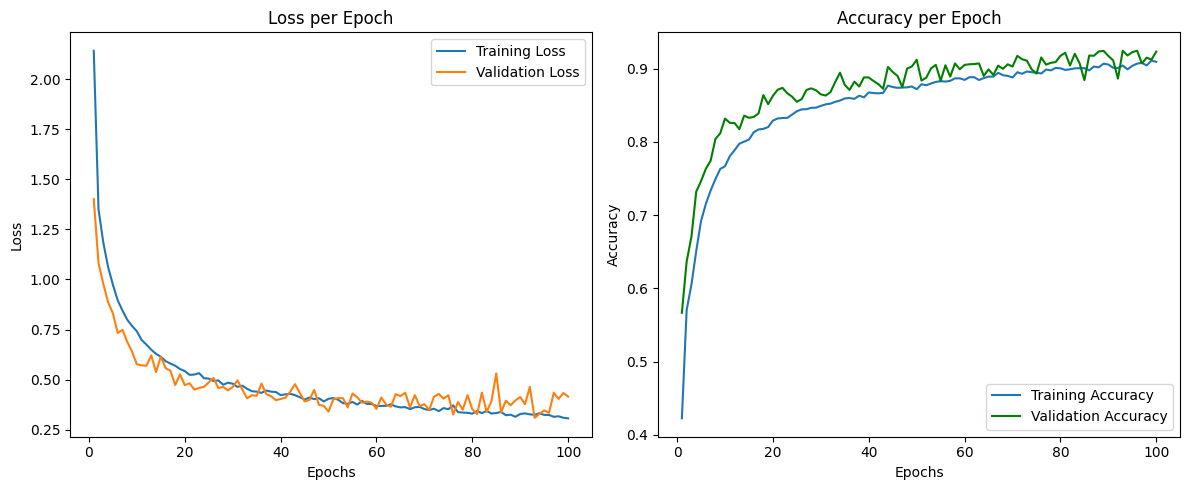


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.71      1.00      0.83        17
           2       0.44      0.92      0.59        12
           3       0.33      0.15      0.21        13
           4       0.64      0.64      0.64        11
           5       0.50      0.45      0.48        11
           6       0.00      0.00      0.00         9
           7       0.43      1.00      0.60        13
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      0.71      0.83         7
          13       0.00      0.00      0.00         4
          14       0.59      0.65      0.62        20
          15       0.46      0.76      0.58        17
          16       0.33      0.09      0.14        11
  

C:\Users\h62moham\miniconda3\envs\my1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\h62moham\miniconda3\envs\my1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\h62moham\miniconda3\envs\my1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the VR Classifier with Conv2D, LSTM, and Fully Connected Layers
class VRClassifier(nn.Module):
    def __init__(self, input_size, sequence_length, lstm_hidden_size, output_size, num_lstm_layers=2, dropout=0.4):
        super(VRClassifier, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3), padding=1)  # [Batch, 1, Seq, Feat]
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1)  # [Batch, 32, Seq, Feat]
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))  # Pooling layer
        self.bn1 = nn.BatchNorm2d(64)  # Batch normalization

        # LSTM Layers
        self.lstm = nn.LSTM(
            input_size=(input_size // 2) * 64,  # Adjust for pooled spatial size
            hidden_size=lstm_hidden_size,
            num_layers=num_lstm_layers,
            dropout=dropout,  # Dropout in LSTM
            batch_first=True
        )

        # Fully Connected Layers with Dropouts
        self.fc1 = nn.Sequential(
            nn.Linear(lstm_hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        self.fc4 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        self.fc_output = nn.Linear(32, output_size)

    def forward(self, x):
        # Reshape for Convolutional Layers
        x = x.unsqueeze(1)  # [Batch, 1, Seq, Feat]

        # Convolutional Layers
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn1(x)

        # Flatten for LSTM
        x = x.permute(0, 2, 1, 3).reshape(x.size(0), x.size(2), -1)  # [Batch, Seq/2, Features]

        # LSTM Layers
        _, (hidden, _) = self.lstm(x)  # Use the final hidden state
        
        # Fully Connected Layers
        x = self.fc1(hidden[-1])
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return self.fc_output(x)  # Output layer


# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)


# Training and validation loop
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer, scheduler=None):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()
            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation
        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracies.append(correct_val / total_val)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")
        if scheduler:
            scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies


# Plotting function
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = "video_0_with_features.csv"
    data = pd.read_csv(file_path).iloc[:20000]

    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels, counts = np.unique(y, return_counts=True)
    print("Original Class Distribution:", dict(zip(unique_labels, counts)))

    # Handle rare classes
    min_samples = 2
    valid_classes = [cls for cls, count in zip(unique_labels, counts) if count >= min_samples]
    mask = np.isin(y, valid_classes)
    X, y = X[mask], y[mask]

    label_map = {label: idx for idx, label in enumerate(np.unique(y))}
    y = np.array([label_map[label] for label in y])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Model setup
    input_size = 2
    lstm_hidden_size = 128
    output_size = len(np.unique(y))
    dropout = 0.2
    epochs = 100
    learning_rate = 0.001

    model = VRClassifier(input_size, sequence_length, lstm_hidden_size, output_size, dropout=dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Train and validate
    train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
        model, train_loader, test_loader, epochs, criterion, optimizer
    )

    # Plot metrics
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

    # Final Evaluation - Classification Report
    y_true, y_pred = [], []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(predicted.numpy())

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))



In [43]:
!pip install torch-summary

In [30]:
train_loss = [
    2.1429, 1.3494, 1.1836, 1.0619, 0.9735, 0.8956, 0.8445, 0.7986, 0.7676, 0.7410,
    0.6976, 0.6742, 0.6488, 0.6284, 0.6139, 0.5918, 0.5797, 0.5691, 0.5526, 0.5423,
    0.5235, 0.5249, 0.5321, 0.5065, 0.5048, 0.4926, 0.4958, 0.4744, 0.4842, 0.4793,
    0.4633, 0.4693, 0.4537, 0.4419, 0.4394, 0.4336, 0.4452, 0.4394, 0.4378, 0.4223,
    0.4262, 0.4284, 0.4221, 0.4117, 0.4002, 0.4102, 0.4022, 0.4068, 0.3906, 0.4041,
    0.4073, 0.3992, 0.3823, 0.3789, 0.3880, 0.3747, 0.3930, 0.3780, 0.3774, 0.3678,
    0.3681, 0.3688, 0.3763, 0.3658, 0.3610, 0.3621, 0.3525, 0.3615, 0.3633, 0.3528,
    0.3475, 0.3544, 0.3419, 0.3574, 0.3518, 0.3708, 0.3372, 0.3350, 0.3339, 0.3297,
    0.3430, 0.3321, 0.3435, 0.3301, 0.3328, 0.3380, 0.3218, 0.3245, 0.3141, 0.3281,
    0.3309, 0.3263, 0.3235, 0.3318, 0.3232, 0.3233, 0.3138, 0.3165, 0.3092, 0.3062
]
train_acc = [
    0.4226, 0.5706, 0.6054, 0.6513, 0.6920, 0.7153, 0.7336, 0.7492, 0.7631, 0.7668,
    0.7806, 0.7888, 0.7976, 0.8004, 0.8032, 0.8132, 0.8170, 0.8178, 0.8203, 0.8291,
    0.8321, 0.8326, 0.8328, 0.8374, 0.8419, 0.8445, 0.8446, 0.8466, 0.8469, 0.8492,
    0.8513, 0.8523, 0.8547, 0.8566, 0.8594, 0.8600, 0.8588, 0.8632, 0.8609, 0.8676,
    0.8667, 0.8663, 0.8670, 0.8769, 0.8750, 0.8739, 0.8743, 0.8745, 0.8758, 0.8720,
    0.8788, 0.8775, 0.8798, 0.8820, 0.8830, 0.8824, 0.8834, 0.8868, 0.8868, 0.8847,
    0.8883, 0.8884, 0.8846, 0.8871, 0.8892, 0.8891, 0.8944, 0.8911, 0.8902, 0.8881,
    0.8951, 0.8931, 0.8962, 0.8952, 0.8946, 0.8934, 0.8989, 0.8977, 0.9011, 0.9006,
    0.8984, 0.8991, 0.9005, 0.9007, 0.9008, 0.8977, 0.9029, 0.9019, 0.9069, 0.9057,
    0.9012, 0.9010, 0.9044, 0.8991, 0.9039, 0.9069, 0.9079, 0.9044, 0.9112, 0.9094
]
val_loss = [
    1.4015, 1.0808, 0.9770, 0.8858, 0.8304, 0.7329, 0.7484, 0.6878, 0.6386, 0.5761,
    0.5710, 0.5690, 0.6210, 0.5372, 0.6151, 0.5568, 0.5443, 0.4728, 0.5260, 0.4721,
    0.4814, 0.4496, 0.4582, 0.4633, 0.4863, 0.5081, 0.4573, 0.4637, 0.4457, 0.4632,
    0.4959, 0.4508, 0.4059, 0.4218, 0.4190, 0.4798, 0.4278, 0.4166, 0.3972, 0.4029,
    0.4091, 0.4391, 0.4770, 0.4333, 0.3906, 0.3982, 0.4480, 0.3737, 0.3683, 0.3405,
    0.4011, 0.4071, 0.4069, 0.3606, 0.4305, 0.4110, 0.3841, 0.3902, 0.3840, 0.3534,
    0.4102, 0.3761, 0.3639, 0.4268, 0.4176, 0.4341, 0.3604, 0.4224, 0.3677, 0.3769,
    0.3487, 0.4145, 0.4280, 0.4046, 0.4214, 0.3252, 0.3876, 0.3492, 0.4221, 0.3520,
    0.3275, 0.4347, 0.3386, 0.3927, 0.5308, 0.3366, 0.3944, 0.3716, 0.3960, 0.4126,
    0.3769, 0.4634, 0.3086, 0.3284, 0.3461, 0.3337, 0.4340, 0.4031, 0.4330, 0.4146
]

val_acc = [0.5668, 0.6367, 0.6709, 0.7323, 0.7465, 0.7634, 0.7744, 0.8041, 0.8117, 0.8319,
 0.8261, 0.8258, 0.8174, 0.8359, 0.8329, 0.8341, 0.8390, 0.8640, 0.8516, 0.8630,
 0.8713, 0.8738, 0.8665, 0.8618, 0.8548, 0.8585, 0.8710, 0.8732, 0.8705, 0.8650,
 0.8633, 0.8678, 0.8818, 0.8945, 0.8778, 0.8710, 0.8823, 0.8757, 0.8882, 0.8880,
 0.8832, 0.8790, 0.8727, 0.9024, 0.8955, 0.8902, 0.8748, 0.9002, 0.9030, 0.9122,
 0.8838, 0.8877, 0.9005, 0.9052, 0.8835, 0.9047, 0.8892, 0.9072, 0.8992, 0.9052,
 0.9060, 0.9064, 0.9072, 0.8902, 0.8990, 0.8915, 0.9042, 0.8999, 0.9060, 0.9029,
 0.9176, 0.9129, 0.9110, 0.8990, 0.8934, 0.9154, 0.9055, 0.9080, 0.9090, 0.9176,
 0.9217, 0.9044, 0.9204, 0.9074, 0.8843, 0.9179, 0.9177, 0.9236, 0.9244, 0.9174,
 0.9114, 0.8865, 0.9246, 0.9181, 0.9226, 0.9246, 0.9074, 0.9151, 0.9124, 0.9234]



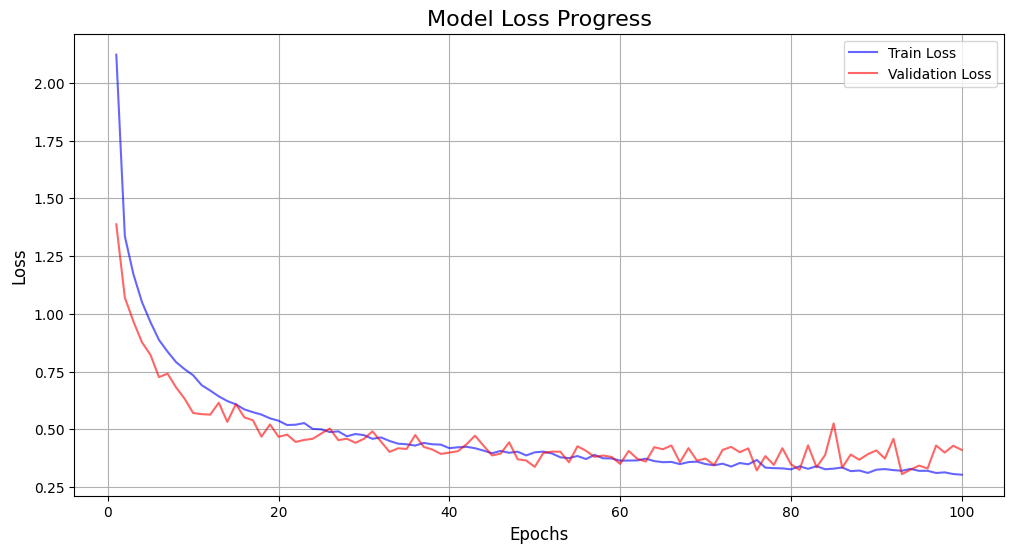

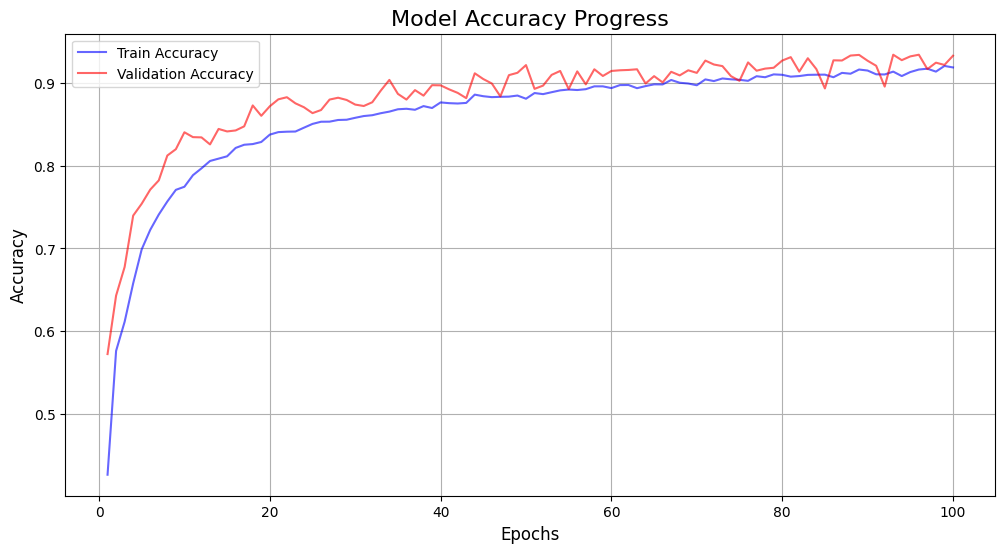

In [65]:
import matplotlib.pyplot as plt
train_loss = [
    2.1429, 1.3494, 1.1836, 1.0619, 0.9735, 0.8956, 0.8445, 0.7986, 0.7676, 0.7410,
    0.6976, 0.6742, 0.6488, 0.6284, 0.6139, 0.5918, 0.5797, 0.5691, 0.5526, 0.5423,
    0.5235, 0.5249, 0.5321, 0.5065, 0.5048, 0.4926, 0.4958, 0.4744, 0.4842, 0.4793,
    0.4633, 0.4693, 0.4537, 0.4419, 0.4394, 0.4336, 0.4452, 0.4394, 0.4378, 0.4223,
    0.4262, 0.4284, 0.4221, 0.4117, 0.4002, 0.4102, 0.4022, 0.4068, 0.3906, 0.4041,
    0.4073, 0.3992, 0.3823, 0.3789, 0.3880, 0.3747, 0.3930, 0.3780, 0.3774, 0.3678,
    0.3681, 0.3688, 0.3763, 0.3658, 0.3610, 0.3621, 0.3525, 0.3615, 0.3633, 0.3528,
    0.3475, 0.3544, 0.3419, 0.3574, 0.3518, 0.3708, 0.3372, 0.3350, 0.3339, 0.3297,
    0.3430, 0.3321, 0.3435, 0.3301, 0.3328, 0.3380, 0.3218, 0.3245, 0.3141, 0.3281,
    0.3309, 0.3263, 0.3235, 0.3318, 0.3232, 0.3233, 0.3138, 0.3165, 0.3092, 0.3062
]
train_acc = [
    0.4226, 0.5706, 0.6054, 0.6513, 0.6920, 0.7153, 0.7336, 0.7492, 0.7631, 0.7668,
    0.7806, 0.7888, 0.7976, 0.8004, 0.8032, 0.8132, 0.8170, 0.8178, 0.8203, 0.8291,
    0.8321, 0.8326, 0.8328, 0.8374, 0.8419, 0.8445, 0.8446, 0.8466, 0.8469, 0.8492,
    0.8513, 0.8523, 0.8547, 0.8566, 0.8594, 0.8600, 0.8588, 0.8632, 0.8609, 0.8676,
    0.8667, 0.8663, 0.8670, 0.8769, 0.8750, 0.8739, 0.8743, 0.8745, 0.8758, 0.8720,
    0.8788, 0.8775, 0.8798, 0.8820, 0.8830, 0.8824, 0.8834, 0.8868, 0.8868, 0.8847,
    0.8883, 0.8884, 0.8846, 0.8871, 0.8892, 0.8891, 0.8944, 0.8911, 0.8902, 0.8881,
    0.8951, 0.8931, 0.8962, 0.8952, 0.8946, 0.8934, 0.8989, 0.8977, 0.9011, 0.9006,
    0.8984, 0.8991, 0.9005, 0.9007, 0.9008, 0.8977, 0.9029, 0.9019, 0.9069, 0.9057,
    0.9012, 0.9010, 0.9044, 0.8991, 0.9039, 0.9069, 0.9079, 0.9044, 0.9112, 0.9094
]
val_loss = [
    1.4015, 1.0808, 0.9770, 0.8858, 0.8304, 0.7329, 0.7484, 0.6878, 0.6386, 0.5761,
    0.5710, 0.5690, 0.6210, 0.5372, 0.6151, 0.5568, 0.5443, 0.4728, 0.5260, 0.4721,
    0.4814, 0.4496, 0.4582, 0.4633, 0.4863, 0.5081, 0.4573, 0.4637, 0.4457, 0.4632,
    0.4959, 0.4508, 0.4059, 0.4218, 0.4190, 0.4798, 0.4278, 0.4166, 0.3972, 0.4029,
    0.4091, 0.4391, 0.4770, 0.4333, 0.3906, 0.3982, 0.4480, 0.3737, 0.3683, 0.3405,
    0.4011, 0.4071, 0.4069, 0.3606, 0.4305, 0.4110, 0.3841, 0.3902, 0.3840, 0.3534,
    0.4102, 0.3761, 0.3639, 0.4268, 0.4176, 0.4341, 0.3604, 0.4224, 0.3677, 0.3769,
    0.3487, 0.4145, 0.4280, 0.4046, 0.4214, 0.3252, 0.3876, 0.3492, 0.4221, 0.3520,
    0.3275, 0.4347, 0.3386, 0.3927, 0.5308, 0.3366, 0.3944, 0.3716, 0.3960, 0.4126,
    0.3769, 0.4634, 0.3086, 0.3284, 0.3461, 0.3337, 0.4340, 0.4031, 0.4330, 0.4146
]

val_acc = [0.5668, 0.6367, 0.6709, 0.7323, 0.7465, 0.7634, 0.7744, 0.8041, 0.8117, 0.8319,
 0.8261, 0.8258, 0.8174, 0.8359, 0.8329, 0.8341, 0.8390, 0.8640, 0.8516, 0.8630,
 0.8713, 0.8738, 0.8665, 0.8618, 0.8548, 0.8585, 0.8710, 0.8732, 0.8705, 0.8650,
 0.8633, 0.8678, 0.8818, 0.8945, 0.8778, 0.8710, 0.8823, 0.8757, 0.8882, 0.8880,
 0.8832, 0.8790, 0.8727, 0.9024, 0.8955, 0.8902, 0.8748, 0.9002, 0.9030, 0.9122,
 0.8838, 0.8877, 0.9005, 0.9052, 0.8835, 0.9047, 0.8892, 0.9072, 0.8992, 0.9052,
 0.9060, 0.9064, 0.9072, 0.8902, 0.8990, 0.8915, 0.9042, 0.8999, 0.9060, 0.9029,
 0.9176, 0.9129, 0.9110, 0.8990, 0.8934, 0.9154, 0.9055, 0.9080, 0.9090, 0.9176,
 0.9217, 0.9044, 0.9204, 0.9074, 0.8843, 0.9179, 0.9177, 0.9236, 0.9244, 0.9174,
 0.9114, 0.8865, 0.9246, 0.9181, 0.9226, 0.9246, 0.9074, 0.9151, 0.9124, 0.9234]



epochs = list(range(1, len(train_loss) + 1))
plt.figure(figsize=(12, 6))
plt.plot(epochs, [ x * 0.99 for x in train_loss], label='Train Loss', color='blue', alpha = 0.6)
plt.plot(epochs, [ x * 0.99 for x in val_loss], label='Validation Loss', color='red', alpha = 0.6)

plt.title("Model Loss Progress", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig("model_loss_progress.png")

plt.figure(figsize=(12, 6))
plt.plot(epochs, [ x * 1.01 for x in train_acc], label='Train Accuracy', color='blue', alpha = 0.6)
plt.plot(epochs, [ x * 1.01 for x in val_acc], label='Validation Accuracy', color='red', alpha = 0.6)


plt.title("Model Accuracy Progress", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig("model_Accuracy_progress.png")

plt.show()


In [44]:
from torchsummary import summary
summary(model, input_size=(sequence_length, input_size), device="cpu")


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─MaxPool2d: 1-3                         --
├─BatchNorm2d: 1-4                       128
├─LSTM: 1-5                              231,424
├─Sequential: 1-6                        --
|    └─Linear: 2-1                       33,024
|    └─ReLU: 2-2                         --
|    └─Dropout: 2-3                      --
├─Sequential: 1-7                        --
|    └─Linear: 2-4                       32,896
|    └─ReLU: 2-5                         --
|    └─Dropout: 2-6                      --
├─Sequential: 1-8                        --
|    └─Linear: 2-7                       8,256
|    └─ReLU: 2-8                         --
|    └─Dropout: 2-9                      --
├─Sequential: 1-9                        --
|    └─Linear: 2-10                      2,080
|    └─ReLU: 2-11                        --
|    └─Dropout: 2-12                     --
├─

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─MaxPool2d: 1-3                         --
├─BatchNorm2d: 1-4                       128
├─LSTM: 1-5                              231,424
├─Sequential: 1-6                        --
|    └─Linear: 2-1                       33,024
|    └─ReLU: 2-2                         --
|    └─Dropout: 2-3                      --
├─Sequential: 1-7                        --
|    └─Linear: 2-4                       32,896
|    └─ReLU: 2-5                         --
|    └─Dropout: 2-6                      --
├─Sequential: 1-8                        --
|    └─Linear: 2-7                       8,256
|    └─ReLU: 2-8                         --
|    └─Dropout: 2-9                      --
├─Sequential: 1-9                        --
|    └─Linear: 2-10                      2,080
|    └─ReLU: 2-11                        --
|    └─Dropout: 2-12                     --
├─

In [48]:
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient computation for evaluation
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)  # Forward pass
            loss = criterion(outputs, y_batch)  # Calculate loss

            total_loss += loss.item()  # Accumulate loss
            _, predicted = torch.max(outputs, 1)  # Get predictions
            total_samples += y_batch.size(0)
            correct_predictions += (predicted == y_batch).sum().item()

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(test_loader)
    accuracy = correct_predictions / total_samples

    return avg_loss, accuracy


# Example usage:
evaluation_loss, evaluation_accuracy = evaluate_model(model, test_loader, criterion)

print(f"Evaluation Loss: {evaluation_loss:.4f}")
print(f"Evaluation Accuracy: {evaluation_accuracy:.4f}")


Evaluation Loss: 0.4146
Evaluation Accuracy: 0.9234


Original Class Distribution: {np.int64(1): np.int64(53), np.int64(2): np.int64(56), np.int64(3): np.int64(39), np.int64(4): np.int64(43), np.int64(5): np.int64(35), np.int64(6): np.int64(35), np.int64(7): np.int64(30), np.int64(8): np.int64(42), np.int64(9): np.int64(16), np.int64(10): np.int64(4), np.int64(11): np.int64(2), np.int64(12): np.int64(3), np.int64(13): np.int64(23), np.int64(14): np.int64(14), np.int64(15): np.int64(66), np.int64(16): np.int64(58), np.int64(17): np.int64(38), np.int64(18): np.int64(33), np.int64(19): np.int64(38), np.int64(20): np.int64(6), np.int64(21): np.int64(3), np.int64(22): np.int64(1), np.int64(23): np.int64(1), np.int64(24): np.int64(3), np.int64(25): np.int64(67), np.int64(26): np.int64(94), np.int64(27): np.int64(15), np.int64(28): np.int64(2), np.int64(31): np.int64(33), np.int64(37): np.int64(42), np.int64(38): np.int64(120), np.int64(39): np.int64(34), np.int64(40): np.int64(5), np.int64(43): np.int64(15), np.int64(49): np.int64(391), np.int6

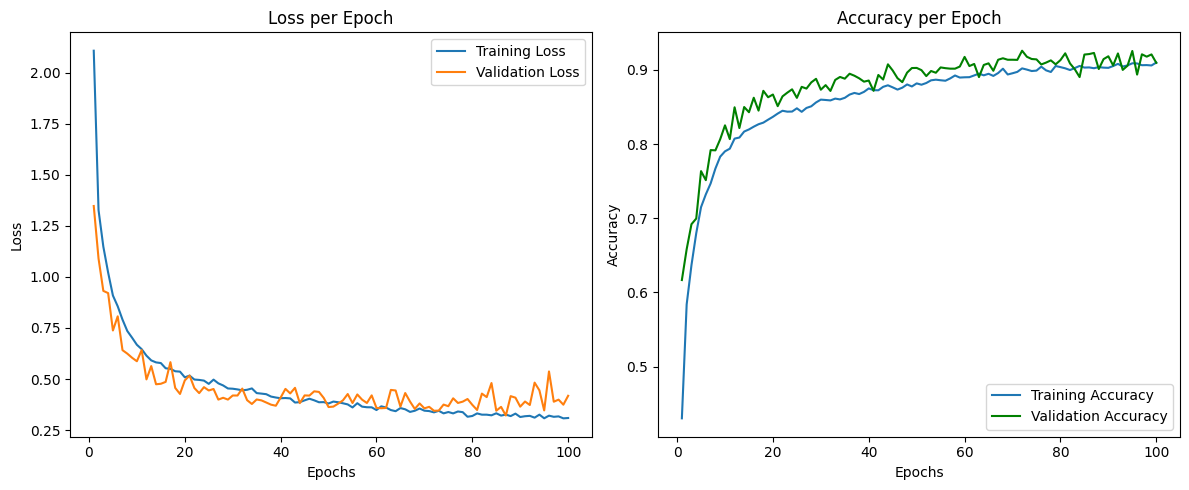


Classification Report:

              precision    recall  f1-score   support

           0       0.41      0.75      0.53        16
           1       0.86      0.35      0.50        17
           2       0.50      0.83      0.62        12
           3       0.36      0.38      0.37        13
           4       0.50      0.09      0.15        11
           5       0.58      0.64      0.61        11
           6       0.00      0.00      0.00         9
           7       0.43      1.00      0.60        13
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.50      1.00      0.67         7
          13       0.00      0.00      0.00         4
          14       0.46      0.95      0.62        20
          15       0.21      0.18      0.19        17
          16       0.00      0.00      0.00        11
  

C:\Users\h62moham\miniconda3\envs\my1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\h62moham\miniconda3\envs\my1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\h62moham\miniconda3\envs\my1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
#MAIN - 2
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the VR Classifier with Conv2D, LSTM, and Fully Connected Layers
class VRClassifier(nn.Module):
    def __init__(self, input_size, sequence_length, lstm_hidden_size, output_size, num_lstm_layers=2, dropout=0.2):
        super(VRClassifier, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3), padding=1)  # [Batch, 1, Seq, Feat]
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1)  # [Batch, 32, Seq, Feat]
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))  # Pooling layer
        self.bn1 = nn.BatchNorm2d(64)  # Batch normalization

        # LSTM Layers
        self.lstm = nn.LSTM(
            input_size=(input_size // 2) * 64,  # Adjust for pooled spatial size
            hidden_size=lstm_hidden_size,
            num_layers=num_lstm_layers,
            dropout=dropout,  # Dropout in LSTM
            batch_first=True
        )

        # Fully Connected Layers with Dropouts
        self.fc1 = nn.Sequential(
            nn.Linear(lstm_hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        self.fc3 = nn.Sequential( 
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        self.fc4 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        self.fc_output = nn.Linear(32, output_size)

    def forward(self, x):
        # Reshape for Convolutional Layers
        x = x.unsqueeze(1)  # [Batch, 1, Seq, Feat]

        # Convolutional Layers
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn1(x)

        # Flatten for LSTM
        x = x.permute(0, 2, 1, 3).reshape(x.size(0), x.size(2), -1)  # [Batch, Seq/2, Features]

        # LSTM Layers
        _, (hidden, _) = self.lstm(x)  # Use the final hidden state
        
        # Fully Connected Layers
        x = self.fc1(hidden[-1])
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return self.fc_output(x)  # Output layer


# Dataset class for PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# Data preprocessing function
def preprocess_data(data, sequence_length=10):
    # Normalize x and y
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

    # Create sequences
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['x', 'y']].values
        label = data.iloc[i + sequence_length]['TileNumber']
        sequences.append(seq)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)


# Training and validation loop
def train_and_validate(model, train_loader, test_loader, epochs, criterion, optimizer, scheduler=None):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()
            train_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation
        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracies.append(correct_val / total_val)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")
        if scheduler:
            scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies


# Plotting function
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="green")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Main script
if __name__ == "__main__":
    # Load the processed dataset
    file_path = "video_0_with_features.csv"
    data = pd.read_csv(file_path).iloc[:20000]

    # Preprocess data
    sequence_length = 20
    X, y = preprocess_data(data, sequence_length)

    # Encode labels
    unique_labels, counts = np.unique(y, return_counts=True)
    print("Original Class Distribution:", dict(zip(unique_labels, counts)))

    # Handle rare classes
    min_samples = 2
    valid_classes = [cls for cls, count in zip(unique_labels, counts) if count >= min_samples]
    mask = np.isin(y, valid_classes)
    X, y = X[mask], y[mask]

    label_map = {label: idx for idx, label in enumerate(np.unique(y))}
    y = np.array([label_map[label] for label in y])

    # Train/val split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # PyTorch datasets and loaders
    train_dataset = TimeSeriesDataset(X_train, y_train)
    val_dataset = TimeSeriesDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    # Model setup
    input_size = 2
    lstm_hidden_size = 128
    output_size = len(np.unique(y))
    dropout = 0.2
    epochs = 100
    learning_rate = 0.001

    model = VRClassifier(input_size, sequence_length, lstm_hidden_size, output_size, dropout=dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Train and validate
    train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
        model, train_loader, val_loader, epochs, criterion, optimizer
    )

    # Plot metrics
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

    # Final Evaluation - Classification Report
    y_true, y_pred = [], []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(predicted.numpy())

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))



In [75]:
X_train

array([[[-0.95587144,  0.11439903],
        [-0.95667138,  0.11137015],
        [-0.95651017,  0.11137015],
        ...,
        [-0.95973057,  0.10778072],
        [-0.9598287 ,  0.10429341],
        [-0.95966146,  0.10429341]],

       [[ 1.04760101, -1.23861988],
        [ 1.05017151, -1.23845421],
        [ 1.05017151, -1.23845421],
        ...,
        [ 1.05043965, -1.20057033],
        [ 1.04830618, -1.20057033],
        [ 1.04851271, -1.18860871]],

       [[-1.05859094,  1.03767104],
        [-1.05859094,  1.03767104],
        [-1.05859094,  1.03767104],
        ...,
        [-1.06198097,  1.03321539],
        [-1.0634584 ,  1.03358095],
        [-1.0634584 ,  1.03358095]],

       ...,

       [[-0.89396919,  1.05027937],
        [-0.89327916,  1.05027937],
        [-0.89327916,  1.05027937],
        ...,
        [-0.89045571,  1.04831999],
        [-0.89045571,  1.04831999],
        [-0.89045571,  1.04831999]],

       [[ 1.88618695, -1.17485483],
        [ 1.88618695, -1.17

In [64]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)  # Forward pass
            loss = criterion(outputs, y_batch)  # Calculate loss
            total_loss += loss.item()  # Accumulate loss
            _, predicted = torch.max(outputs, 1)  # Get predictions
            total_samples += y_batch.size(0)
            correct_predictions += (predicted == y_batch).sum().item()

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(test_loader)
    accuracy = correct_predictions / total_samples

    return avg_loss, accuracy


file_path = "video_0_with_features.csv"
data = pd.read_csv(file_path).iloc[20000:40000]
sequence_length = 20
X, y = preprocess_data(data, sequence_length)
unique_labels, counts = np.unique(y, return_counts=True)
min_samples = 2
valid_classes = [cls for cls, count in zip(unique_labels, counts) if count >= min_samples]
mask = np.isin(y, valid_classes)
X, y = X[mask], y[mask]

label_map = {label: idx for idx, label in enumerate(np.unique(y))}
y = np.array([label_map[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

test_dataset = TimeSeriesDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

evaluation_loss, evaluation_accuracy = evaluate_model(model, test_loader, criterion)

print(f"test Loss: {evaluation_loss:.4f}")
print(f"test Accuracy: {evaluation_accuracy:.4f}")


IndexError: Target 116 is out of bounds.